발생일에 따른 지역별 건수와 기후별 특성 파악하기

In [155]:
import weatherAPI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [246]:
#지역 날씨 예시로 보기(발생일, 발생일, 지역코드)
weatherAPI.load2('20210224','20210224','114')

,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,원주,20210224,2.7,0.0,0.6,33.9


In [247]:
#지역, 발생 데이터 불러오기
file_path = 'data_csv/HPAIOccurlist_final.csv'
hpai = pd.read_csv(file_path)
hpai.head()

,주소,축종,사육\r\n두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101


In [248]:
#사육두수 글씨 제대로 고치기
hpai=hpai.rename(columns={'사육\r\n두수':'사육두수'})

In [249]:
#확인
hpai.head()

,주소,축종,사육두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101


In [250]:
#데이터 확인
hpai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육두수    1122 non-null   int64 
 3   진단일     1122 non-null   int64 
 4   발생일     1122 non-null   int64 
 5   지역코드    1122 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 52.7+ KB


In [251]:
#int64인거 고치기
hpai['사육두수']=hpai['사육두수'].astype('str')
hpai['진단일']=hpai['진단일'].astype('str')
hpai['발생일']=hpai['발생일'].astype('str')
hpai['지역코드']=hpai['지역코드'].astype('str')

In [252]:
#확인
hpai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육두수    1122 non-null   object
 3   진단일     1122 non-null   object
 4   발생일     1122 non-null   object
 5   지역코드    1122 non-null   object
dtypes: object(6)
memory usage: 52.7+ KB


In [253]:
#위에 데이터랑 날씨 데이터 합치기
weather_list=['location','date','avg_temperature(C)','daily_rain(mm)','avg_wind(m/s)','avg_r_humidity(%)']
for name in weather_list:
     hpai[name]=np.nan
for i in range(len(hpai)):
    start=hpai.loc[i,'발생일']
    w_data=weatherAPI.load2(start, start, hpai.loc[i,'지역코드'])
    try:
        for col in weather_list:
            hpai.loc[i,col]=w_data.loc[0,col]
    except:
        print('error index:', i)

API error
error index: 581
API error
error index: 696


In [254]:
#확인
hpai.head()

,주소,축종,사육두수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114,원주,20210223,1.9,0.0,1.4,28.0
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211,인제,20170103,1.2,0.0,2.2,60.1
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95,철원,20161209,-0.1,1.7,1.6,68.9
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95,철원,20161130,3.2,1.2,0.9,72.1
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1


In [255]:
#지역코드별로 정렬하기
hpai_sort=hpai.sort_values('지역코드')
hpai_sort.head()

,주소,축종,사육두수,진단일,발생일,지역코드,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,20080507,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210112,20210111,108,서울,20210111,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,20080511,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,20080511,16.0,0.0,2.8,42.4


In [256]:
hpai_sort.to_csv("지역별 날씨.csv", encoding='utf-8-sig', index=False)

In [257]:
#필요없는 열 삭제
hpai1=hpai_sort.drop(['진단일','date'], axis=1)
hpai1.head()

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4


In [260]:
hpai1.to_csv("지역별 날씨_최종.csv", encoding='utf-8-sig', index=False)

In [261]:
#지역코드별 발생숫자 내림차순 확인
hpai1['지역코드'].value_counts()

127    143
203    136
232    132
260     81
156     70
131     54
98      52
245     51
146     40
140     36
251     33
119     31
243     24
133     22
174     19
165     18
236     14
259     11
162     11
112     10
252      9
152      9
159      8
244      7
184      7
254      6
261      6
281      6
138      5
129      5
283      5
99       5
258      5
108      5
192      5
257      4
288      4
143      4
114      3
262      3
177      3
235      2
101      2
95       2
279      2
211      1
137      1
239      1
202      1
168      1
272      1
188      1
273      1
164      1
268      1
284      1
248      1
Name: 지역코드, dtype: int64

In [262]:
#지역명별 발생숫자 내림차순 확인
hpai1['location'].value_counts()

충주     143
이천     136
천안     132
장흥      81
광주      70
청주      54
동두천     52
정읍      51
전주      40
군산      36
고창군     33
수원      31
부안      24
대전      22
순천      19
목포      18
부여      14
강진군     11
통영      11
인천      10
영광군      9
울산       9
부산       8
임실       7
제주       7
영천       6
해남       6
파주       5
경주시      5
진주       5
서산       5
보성군      5
순창군      5
서울       5
포항       5
밀양       4
대구       4
양산시      4
홍성       3
고흥       3
원주       3
보령       2
춘천       2
구미       2
철원       2
세종       1
장수       1
인제       1
성산       1
영주       1
상주       1
여수       1
문경       1
거창       1
양평       1
진도군      1
Name: location, dtype: int64

In [263]:
from matplotlib import font_manager, rc

font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttc')
print(font_list[:])

['C:\\Windows\\Fonts\\batang.ttc', 'C:\\Windows\\Fonts\\segoescb.ttf', 'C:\\Windows\\Fonts\\REFSPCL.TTF', 'C:\\Windows\\Fonts\\ERASDEMI.TTF', 'C:\\Windows\\Fonts\\LHANDW.TTF', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\micross.ttf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream9.otf', 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubWorld Dotum Medium.ttf', 'C:\\Windows\\Fonts\\GOTHIC.TTF', 'C:\\Windows\\Fonts\\Sitka.ttc', 'C:\\Windows\\Fonts\\simsun.ttc', 'C:\\Windows\\Fonts\\ANTQUAB.TTF', 'C:\\Windows\\Fonts\\HMKMMAG.TTF', 'C:\\Windows\\Fonts\\YuGothM.ttc', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\Fonts\\PERB____.TTF', 'C:\\Windows\\Fonts\\cambriab.ttf', 'C:\\Windows\\Fonts\\ROCKB.TTF', 'C:\\Windows\\Fonts\\BOOKOSBI.TTF', 'C:\\Windows\\Fonts\\CALIFR.TTF', 'C:\\Windows\\Fonts\\gadugib.ttf', 'C:\\Windows\\Fonts\\SCHLBKBI.TTF', 'C:\\Windows\\Fonts\\msjhbd.ttc', 'C:\\Windows\\Fonts\\PER_____.TTF', 'C:\\Windows\\Fonts\\FRADMIT.

C:\Users\user\.conda\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, '춘천'),
  Text(1, 0, '서울'),
  Text(2, 0, '인천'),
  Text(3, 0, '원주'),
  Text(4, 0, '수원'),
  Text(5, 0, '충주'),
  Text(6, 0, '서산'),
  Text(7, 0, '청주'),
  Text(8, 0, '대전'),
  Text(9, 0, '상주'),
  Text(10, 0, '포항'),
  Text(11, 0, '군산'),
  Text(12, 0, '대구'),
  Text(13, 0, '전주'),
  Text(14, 0, '울산'),
  Text(15, 0, '광주'),
  Text(16, 0, '부산'),
  Text(17, 0, '통영'),
  Text(18, 0, '목포'),
  Text(19, 0, '여수'),
  Text(20, 0, '순천'),
  Text(21, 0, '홍성'),
  Text(22, 0, '제주'),
  Text(23, 0, '성산'),
  Text(24, 0, '진주'),
  Text(25, 0, '양평'),
  Text(26, 0, '이천'),
  Text(27, 0, '인제'),
  Text(28, 0, '천안'),
  Text(29, 0, '보령'),
  Text(30, 0, '부여'),
  Text(31, 0, '세종'),
  Text(32, 0, '부안'),
  Text(33, 0, '임실'),
  Text(34, 0, '정읍'),
  Text(35, 0, '장수

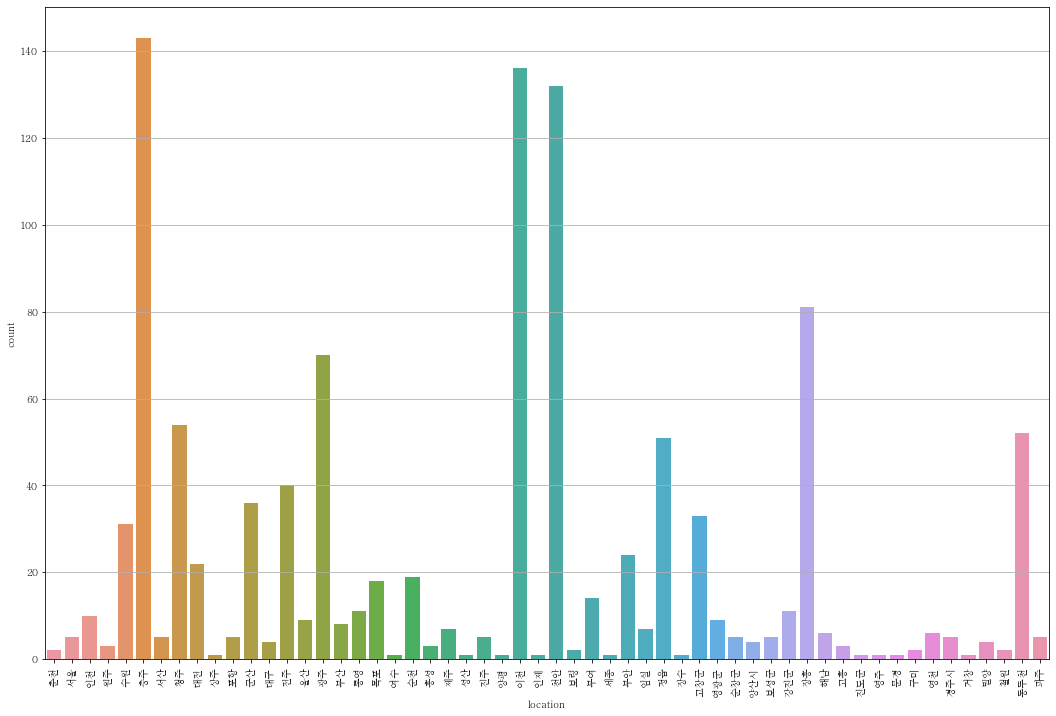

In [264]:
#지역별 발생숫자 시각화
f, ax = plt.subplots(1, figsize=(18,12))

fontname = 'C:\\WINDOWS\\Fonts\\batang.ttc'
fontname = font_manager.FontProperties(fname=fontname).get_name()

sns.countplot(hpai1.location)
plt.xticks(rotation=90)

In [265]:
hpai_list={}
for n1, group in hpai1.groupby('location'):
    group=group.sort_values('발생일') # 발생일순 정렬
    group.reset_index(drop=True, inplace=True)
    hpai_list[n1]=group

In [266]:
hpai_list.keys()

dict_keys(['강진군', '거창', '경주시', '고창군', '고흥', '광주', '구미', '군산', '대구', '대전', '동두천', '목포', '문경', '밀양', '보령', '보성군', '부산', '부안', '부여', '상주', '서산', '서울', '성산', '세종', '수원', '순창군', '순천', '양산시', '양평', '여수', '영광군', '영주', '영천', '울산', '원주', '이천', '인제', '인천', '임실', '장수', '장흥', '전주', '정읍', '제주', '진도군', '진주', '천안', '철원', '청주', '춘천', '충주', '통영', '파주', '포항', '해남', '홍성'])

In [267]:
hpai_list['강진군']

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,전라남도 강진군 성전면 금당리,오리-육용오리,1,20140504,259,강진군,12.9,0.4,2.6,66.9
1,전라남도 강진군 성전면 금당리,오리-종오리,15000,20150428,259,강진군,16.4,46.0,3.1,87.9
2,전라남도 강진군 칠량면 삼흥리,오리-육용오리,6850,20150914,259,강진군,18.9,0.0,1.7,71.8
3,전라남도 강진군 강진읍 덕남리,닭-기타,60,20150921,259,강진군,20.8,0.0,1.6,83.1
4,전라남도 강진군 신전면 송천리,오리-육용오리,8800,20170226,259,강진군,3.7,0.0,2.0,64.0
5,전라남도 강진군 도암면 석문리,오리-육용오리,22400,20170305,259,강진군,7.0,0.0,1.9,62.9
6,전라남도 강진군 도암면 석문리,오리-종오리,8000,20170306,259,강진군,3.4,0.0,5.0,46.0
7,전라남도 강진군 도암면 석문리,오리-육용오리,40000,20170306,259,강진군,3.4,0.0,5.0,46.0
8,전라남도 강진군 성전면 금당리,오리-종오리,16800,20170309,259,강진군,6.8,0.0,3.8,49.5
9,전라남도 강진군 작천면 갈동리,오리-종오리,22000,20180104,259,강진군,0.3,0.0,3.0,55.5


In [268]:
hpai_list

{'강진군':                   주소       축종   사육두수       발생일 지역코드 location  \
 0   전라남도 강진군 성전면 금당리  오리-육용오리      1  20140504  259      강진군   
 1   전라남도 강진군 성전면 금당리   오리-종오리  15000  20150428  259      강진군   
 2   전라남도 강진군 칠량면 삼흥리  오리-육용오리   6850  20150914  259      강진군   
 3   전라남도 강진군 강진읍 덕남리     닭-기타     60  20150921  259      강진군   
 4   전라남도 강진군 신전면 송천리  오리-육용오리   8800  20170226  259      강진군   
 5   전라남도 강진군 도암면 석문리  오리-육용오리  22400  20170305  259      강진군   
 6   전라남도 강진군 도암면 석문리   오리-종오리   8000  20170306  259      강진군   
 7   전라남도 강진군 도암면 석문리  오리-육용오리  40000  20170306  259      강진군   
 8   전라남도 강진군 성전면 금당리   오리-종오리  16800  20170309  259      강진군   
 9   전라남도 강진군 작천면 갈동리   오리-종오리  22000  20180104  259      강진군   
 10  전라남도 강진군 성전면 금당리   오리-종오리   5900  20180110  259      강진군   
 
     avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)  
 0                 12.9             0.4            2.6               66.9  
 1                 16.4            46.0            3.1     

In [269]:
hpai1.head()

,주소,축종,사육두수,발생일,지역코드,location,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
5,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,101,춘천,13.2,17.0,0.6,66.1
22,경기도 남양주시 화도읍 차산리,닭-산란계,38400,20210111,108,서울,-6.7,0.0,1.9,62.1
332,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4
331,서울특별시 송파구 장지동,오리-기타,9653,20080511,108,서울,16.0,0.0,2.8,42.4


In [270]:
#hpai1 지역별로 그룹바이하기
hphp=hpai1.groupby('location')
print(hphp)

In [271]:
#확인
hphp.groups

{'강진군': [372, 366, 367, 371, 369, 370, 368, 376, 375, 374, 373], '거창': [269], '경주시': [304, 296, 297, 302, 303], '고창군': [591, 590, 592, 614, 594, 593, 608, 609, 610, 611, 612, 613, 615, 616, 617, 618, 619, 620, 621, 622, 606, 605, 607, 603, 595, 596, 597, 604, 599, 600, 601, 598, 602], '고흥': [379, 378, 377], '광주': [430, 431, 432, 433, 434, 435, 436, 437, 429, 405, 427, 426, 425, 424, 423, 422, 421, 420, 419, 428, 438, 451, 440, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 418, 450, 449, 448, 447, 464, 445, 444, 443, 442, 441, 439, 417, 402, 415, 316, 315, 416, 558, 557, 398, 399, 400, 401, 462, 463, 404, 413, 403, 414, 412, 410, 411, 409, 408, 407, 406], '구미': [305, 308], '군산': [703, 699, 700, 701, 702, 704, 716, 706, 627, 628, 629, 705, 626, 625, 624, 713, 714, 630, 715, 717, 719, 718, 721, 807, 707, 708, 709, 710, 720, 711, 809, 623, 712, 723, 722, 808], '대구': [319, 317, 318, 320], '대전': [347, 354, 348, 338, 349, 346, 351, 352, 353, 350, 345, 339, 343, 342, 341, 340, 334, 929, 33

In [272]:
#지역별 평균 날씨
hhh=hphp.mean()
print(hhh)
print(hpai1)

          avg_temperature(C)  daily_rain(mm)  avg_wind(m/s)  avg_r_humidity(%)
location                                                                      
강진군                 8.390909        4.900000       3.072727          64.972727
거창                 -9.000000        0.000000       1.700000          57.800000
경주시                 1.900000        4.800000       3.400000          48.160000
고창군                 2.300000        1.327273       1.860606          68.363636
고흥                  4.000000       21.166667       1.866667          70.133333
광주                  6.971429        1.701429       1.745714          64.267143
구미                 -2.300000        0.000000       1.800000          41.300000
군산                  8.391667        0.980556       3.044444          73.947222
대구                 24.375000        0.250000       1.650000          51.900000
대전                  3.959091        3.300000       1.100000          69.677273
동두천                 2.390385        0.428846       1

In [273]:
#지역 별 평균날씨 확인
hhh

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
location,,,,
강진군,8.390909,4.900000,3.072727,64.972727
거창,-9.000000,0.000000,1.700000,57.800000
경주시,1.900000,4.800000,3.400000,48.160000
고창군,2.300000,1.327273,1.860606,68.363636
고흥,4.000000,21.166667,1.866667,70.133333
광주,6.971429,1.701429,1.745714,64.267143
구미,-2.300000,0.000000,1.800000,41.300000
군산,8.391667,0.980556,3.044444,73.947222
대구,24.375000,0.250000,1.650000,51.900000


In [274]:
#지역별 발생건수 카운팅(내림차순)
aiai = hpai1['location'].value_counts()
aiai

충주     143
이천     136
천안     132
장흥      81
광주      70
청주      54
동두천     52
정읍      51
전주      40
군산      36
고창군     33
수원      31
부안      24
대전      22
순천      19
목포      18
부여      14
강진군     11
통영      11
인천      10
영광군      9
울산       9
부산       8
임실       7
제주       7
영천       6
해남       6
파주       5
경주시      5
진주       5
서산       5
보성군      5
순창군      5
서울       5
포항       5
밀양       4
대구       4
양산시      4
홍성       3
고흥       3
원주       3
보령       2
춘천       2
구미       2
철원       2
세종       1
장수       1
인제       1
성산       1
영주       1
상주       1
여수       1
문경       1
거창       1
양평       1
진도군      1
Name: location, dtype: int64

In [275]:
#데이터프레임화 (두개 합치려고)
aiai_df = pd.DataFrame(aiai)
aiai_df

,location
충주,143
이천,136
천안,132
장흥,81
광주,70
청주,54
동두천,52
정읍,51
전주,40
군산,36


In [276]:
#두개 합치긔
sum_df = [hhh, aiai_df]
HP = pd.concat(sum_df, axis=1)
HP.head()

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),location
강진군,8.390909,4.900000,3.072727,64.972727,11
거창,-9.000000,0.000000,1.700000,57.800000,1
경주시,1.900000,4.800000,3.400000,48.160000,5
고창군,2.300000,1.327273,1.860606,68.363636,33
고흥,4.000000,21.166667,1.866667,70.133333,3


In [277]:
#합친거 내림차순 정렬
HP = HP.sort_values(by='location', ascending = False)
HP.head()

,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),location
충주,2.195105,0.579720,1.661538,60.930769,143
이천,1.138971,0.630882,1.258824,63.795588,136
천안,1.341667,1.368939,1.475758,67.770455,132
장흥,9.064198,7.133333,2.233333,71.367901,81
광주,6.971429,1.701429,1.745714,64.267143,70


In [278]:
HP.columns = ['평균 기온', '강수량', '평균 풍속', '평균 습도', '발생 건수']
HP

,평균 기온,강수량,평균 풍속,평균 습도,발생 건수
충주,2.195105,0.579720,1.661538,60.930769,143
이천,1.138971,0.630882,1.258824,63.795588,136
천안,1.341667,1.368939,1.475758,67.770455,132
장흥,9.064198,7.133333,2.233333,71.367901,81
광주,6.971429,1.701429,1.745714,64.267143,70
청주,3.518519,0.294444,1.372222,55.285185,54
동두천,2.390385,0.428846,1.451923,55.753846,52
정읍,5.315686,1.343137,1.580392,69.615686,51
전주,10.330000,1.235000,1.777500,67.265000,40
군산,8.391667,0.980556,3.044444,73.947222,36


In [279]:
HP.to_csv("발생건수별 평균기온.csv", encoding='utf-8-sig')

In [280]:
#결론 -> 평균날씨와 발생건수는 크게 관련이 없는 것으로 보임
#        지역별 발생 건수를 봤을때 충청도, 전라도 지역이 타지역보다 발생건수가 많은것으로 확인! 

#왜??? => 겨울과 여름 등 계절별로 날씨가 다른데 무조건 평균내서 보니까 특이점이 잘 안보임

#그 다음엔??
#1. 충청도 전라도 지역에 농가가 많은지, 철새 이동과 관련이 있는지 등 다른데이터들과 관련있는지
#2. 계절별로 건수 와 평균날씨 분류해서 다시 확인해보기